In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/email_spam.csv')
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,title,text,type
0,?? the secrets to SUCCESS,"Hi James,\n\nHave you claim your complimentary...",spam
1,?? You Earned 500 GCLoot Points,"\nalt_text\nCongratulations, you just earned\n...",not spam
2,?? Your GitHub launch code,"Here's your GitHub launch code, @Mortyj420!\n ...",not spam
3,[The Virtual Reward Center] Re: ** Clarifications,"Hello,\n \nThank you for contacting the Virtua...",not spam
4,"10-1 MLB Expert Inside, Plus Everything You Ne...","Hey Prachanda Rawal,\n\nToday's newsletter is ...",spam


In [3]:
df.describe()
df.info()
df['type']# To see class distribution
#encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])  # spam → 1, ham → 0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   84 non-null     object
 1   text    84 non-null     object
 2   type    84 non-null     object
dtypes: object(3)
memory usage: 2.1+ KB


In [4]:
df.tail()

,title,text,type
79,Your application for the position of Child Pr...,"Dear Maryam, \n\n \n\nI would like to thank yo...",0
80,Your Kilimall Account is Ready - Shopping Now!,"Dear Customer,\n\nWelcome to Kilimall, Thanks ...",0
81,Your Steam account: Access from new web or mob...,"Dear vladis163rus,\nHere is the Steam Guard co...",0
82,Your uploaded document is rejected,View In Browser | Log in\n \n \n\nSkrill logo\...,0
83,You've Earned a Reward from Bard Explorers India,You've received a gift!\nSign in to your Bard ...,0


In [5]:
df.describe()
df.info()
df['type'].value_counts()  # Check distribution after encoding

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   84 non-null     object
 1   text    84 non-null     object
 2   type    84 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 2.1+ KB


,count
type,
0,58
1,26


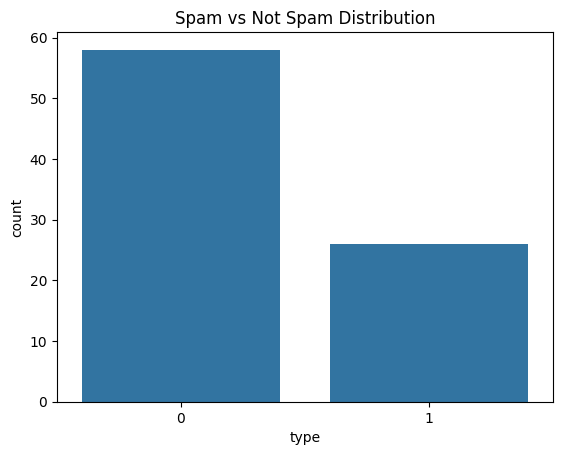

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=df, x='type')
plt.title("Spam vs Not Spam Distribution")
plt.show()


In [9]:
# Handle missing values
df.isnull().sum()



,0
title,0
text,0
type,0


In [8]:
print(df.columns)


Index(['title', 'text', 'type'], dtype='object')


In [10]:
print("Shape of dataset:", df.shape)
print("Columns:", df.columns.tolist())
print(df.info())


Shape of dataset: (84, 3)
Columns: ['title', 'text', 'type']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   84 non-null     object
 1   text    84 non-null     object
 2   type    84 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 2.1+ KB
None


In [12]:
#This will show statistics like:
#Mean/median message length
#Word usage per message
#Text complexity
# Character count
df['char_count'] = df['text'].apply(len)

# Word count
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

# Average word length
df['avg_word_len'] = df['text'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()))

df[['char_count', 'word_count', 'avg_word_len']].describe()


,char_count,word_count,avg_word_len
count,84.000000,84.000000,84.000000
mean,845.690476,137.047619,5.193618
std,989.806151,168.203971,0.995764
min,19.000000,3.000000,3.780220
25%,312.750000,53.000000,4.609271
50%,568.000000,93.000000,5.079167
75%,941.000000,155.250000,5.512145
max,6079.000000,1088.000000,11.482759


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Vectorize the 'text' column
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['text'])  # features
y = df['type']  # labels (already encoded as 0/1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])





Training set size: 67
Test set size: 17


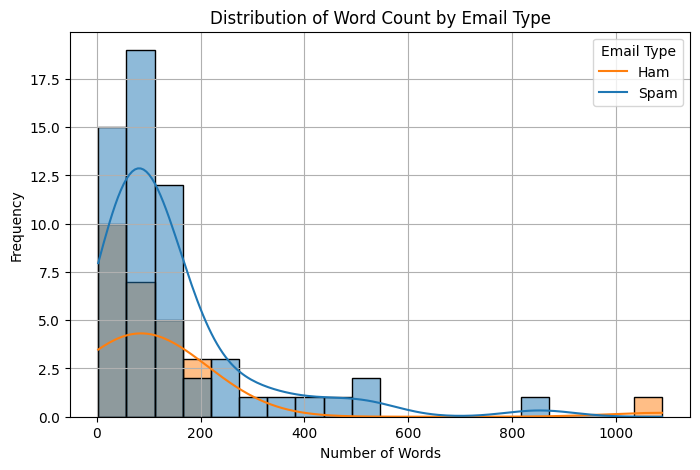

In [22]:
#histogram for word count
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='word_count', bins=20, kde=True, hue='type')
plt.title("Distribution of Word Count by Email Type")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.legend(title='Email Type', labels=['Ham', 'Spam'])
plt.grid(True)
plt.show()



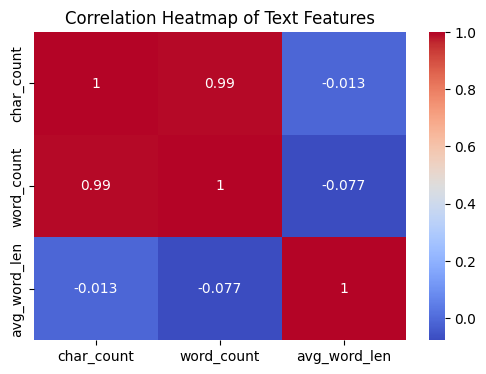

In [24]:
#heatmap
df['char_count'] = df['text'].apply(len)
df['word_count'] = df['text'].apply(lambda x: len(x.split()))
df['avg_word_len'] = df['text'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()))
plt.figure(figsize=(6, 4))
sns.heatmap(df[['char_count', 'word_count', 'avg_word_len']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Text Features")
plt.show()


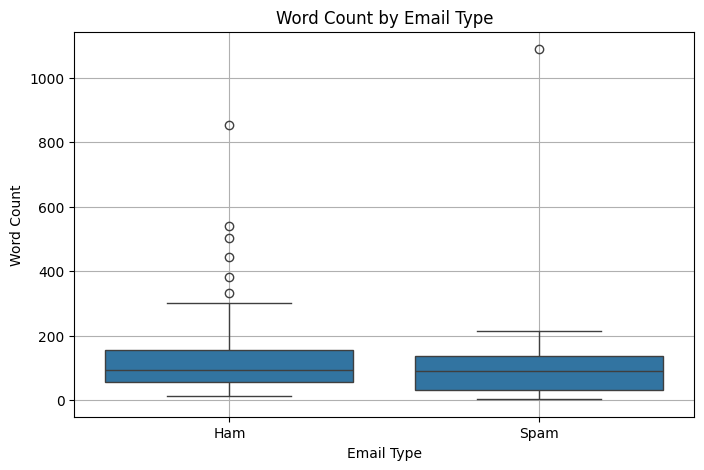

In [25]:
#3. Boxplot — Word Count by Class
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='type', y='word_count')
plt.title("Word Count by Email Type")
plt.xlabel("Email Type")
plt.ylabel("Word Count")
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.grid(True)
plt.show()
